In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [414]:
# Import neighborhood data
neighborhood_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/old_datasets/old_dataset.csv')
neighborhood_data = neighborhood_data.iloc[:, 1:6]
neighborhood_data.head()

,id,borough,neighborhood,longitude,latitude
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834


In [405]:
# features_sorted_save = neighborhood_data.to_csv('neighborhood_geo_population.csv', index=False)

In [415]:
# Import venue data within 1km of each neighborhood
features_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/data/all_features_counts_V3.csv')
features_data = features_data.iloc[:, 2:]
features_data.head()

,id,lodging,restaurant,school,health,bar,church,bank,store,clothing,...,pharmacy,farmersmarket,foodtours,bowling,syrian,southafrican,eventservices,bookstores,homedecor,diyfood
0,nyu_2451_34572.1,9,55,26,13,10,60,12,36,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nyu_2451_34572.2,5,39,26,7,4,25,15,37,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nyu_2451_34572.3,3,33,16,3,11,23,4,36,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nyu_2451_34572.4,2,54,27,7,14,5,24,19,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nyu_2451_34572.5,3,20,25,9,16,12,23,19,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
# Check for missing data
total = features_data.isnull().sum().sort_values(ascending=False)
percent = (features_data.isnull().sum()/features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
ukrainian,0,0.0
dimsum,0,0.0
uzbek,0,0.0
taiwanese,0,0.0


In [417]:
# Create function to find the most common venues per neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [418]:
# Create new dataframe for most common venues
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
features_sorted = pd.DataFrame(columns=columns)
features_sorted['id'] = features_data['id']

for ind in np.arange(features_data.shape[0]):
    features_sorted.iloc[ind, 1:] = return_most_common_venues(features_data.iloc[ind, :], num_top_venues)

features_sorted.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park


In [419]:
features_sorted

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park
...,...,...,...,...,...,...
301,nyu_2451_34572.302,school,bar,bank,store,clothing
302,nyu_2451_34572.303,restaurant,store,church,health,supermarket
303,nyu_2451_34572.304,store,restaurant,church,school,clothing
304,nyu_2451_34572.305,restaurant,school,store,church,lodging


In [420]:
# features_sorted_save = features_sorted.to_csv('most_common_venues.csv', index=False)

In [421]:
total = features_sorted.isnull().sum().sort_values(ascending=False)
percent = (features_sorted.isnull().sum()/features_sorted.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
1st Most Common Venue,0,0.0
2nd Most Common Venue,0,0.0
3rd Most Common Venue,0,0.0
4th Most Common Venue,0,0.0


### K-Means

In [422]:
# Drop neighborhood ID to create numerical data for k-means clustering
features_clustering = features_data.drop('id', axis=1)

In [423]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_clustering))
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.209833,0.497484,-0.281050,0.168836,-0.397033,1.401403,-0.520885,-0.346817,-0.259182,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
1,-0.178723,-0.367460,-0.281050,-0.403089,-0.710156,-0.236601,-0.347004,-0.293218,0.477897,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
2,-0.373000,-0.691814,-0.766385,-0.784372,-0.344845,-0.330201,-0.984567,-0.346817,-0.554014,-0.394861,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
3,-0.470139,0.443425,-0.232517,-0.403089,-0.188284,-1.172603,0.174638,-1.258001,-0.996261,0.244438,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
4,-0.373000,-1.394580,-0.329584,-0.212447,-0.083909,-0.845002,0.116678,-1.258001,-0.947122,-0.181762,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726


In [425]:
# save_file = features_scaled.to_csv('features_scaled_modeling.csv', index=False)

In [426]:
total = features_scaled.isnull().sum().sort_values(ascending=False)
percent = (features_scaled.isnull().sum()/features_scaled.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
0,0,0.0
155,0,0.0
157,0,0.0
158,0,0.0
159,0,0.0


In [427]:
# Create elbow graph function
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

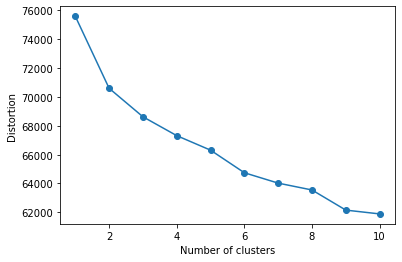

In [428]:
# Plot elbow graph
plot_distortion(features_scaled)

In [429]:
# Cluster data points using kmeans and get labels
kclusters_features = 8

kmeans_features = KMeans(n_clusters=kclusters_features, random_state=0).fit(features_clustering)

kmeans_features.labels_[0:10] 

array([5, 1, 7, 7, 7, 6, 6, 1, 6, 5], dtype=int32)

In [430]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

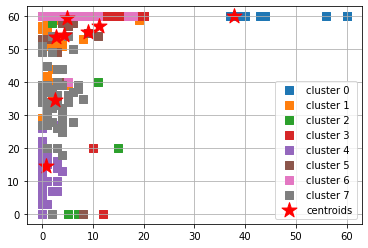

In [431]:
y_km_features = kmeans_features.fit_predict(features_clustering)
plot_clusters(np.array(features_clustering), y_km_features, plt_cluster_centers= True)

In [432]:
# Add cluster labels to venue data
features_sorted.insert(0, 'clusters', kmeans_features.labels_)
clusters = features_sorted.clusters.tolist()
features_sorted = features_sorted.drop('clusters', axis=1)

# Merge venue data with neighborhood data
all_features_data = neighborhood_data.copy()
all_features_data = pd.merge(all_features_data, features_sorted, on='id')
all_features_data['clusters'] = clusters
all_features_data.head()

,id,borough,neighborhood,longitude,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705,church,restaurant,store,school,clothing,5
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294,restaurant,store,clothing,school,church,1
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556,store,restaurant,church,school,clothing,7
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437,restaurant,school,bank,park,store,7
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834,school,bank,restaurant,store,park,7


In [433]:
total = all_features_data.isnull().sum().sort_values(ascending=False)
percent = (all_features_data.isnull().sum()/all_features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
borough,0,0.0
neighborhood,0,0.0
longitude,0,0.0
latitude,0,0.0


### Mapping

In [434]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

In [435]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [436]:
# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_features_data['latitude'], all_features_data['longitude'], all_features_data['neighborhood'],all_features_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysing Clusters

In [437]:
cluster0_features = all_features_data.loc[all_features_data['clusters'] == 0, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster1_features = all_features_data.loc[all_features_data['clusters'] == 1, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster2_features = all_features_data.loc[all_features_data['clusters'] == 2, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster3_features = all_features_data.loc[all_features_data['clusters'] == 3, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster4_features = all_features_data.loc[all_features_data['clusters'] == 4, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster5_features = all_features_data.loc[all_features_data['clusters'] == 5, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster6_features = all_features_data.loc[all_features_data['clusters'] == 6, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster7_features = all_features_data.loc[all_features_data['clusters'] == 7, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]

In [438]:
 cluster0_features

,id,borough,latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
87,nyu_2451_34572.88,Brooklyn,40.685683,restaurant,school,bar,church,bank,0
100,nyu_2451_34572.101,Manhattan,40.715618,restaurant,school,bar,church,bank,0
113,nyu_2451_34572.114,Manhattan,40.759101,lodging,office,school,restaurant,bar,0
114,nyu_2451_34572.115,Manhattan,40.754691,lodging,bank,restaurant,office,clothing,0
115,nyu_2451_34572.116,Manhattan,40.748303,lodging,school,health,bar,church,0
116,nyu_2451_34572.181,Queens,40.764126,church,restaurant,store,korean,school,0
117,nyu_2451_34572.117,Manhattan,40.744035,clothing,bar,store,bank,restaurant,0
120,nyu_2451_34572.119,Manhattan,40.727847,clothing,school,bar,church,bank,0
121,nyu_2451_34572.120,Manhattan,40.717807,school,bar,church,store,restaurant,0
122,nyu_2451_34572.121,Manhattan,40.721522,bar,bank,store,clothing,restaurant,0


In [439]:
print('--cluster0--')
print()
print('Top 5 most common venue type')
print(cluster0_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster0_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0_features['borough'].value_counts()[:3])

--cluster0--

Top 5 most common venue type
school        6
lodging       5
office        3
restaurant    2
clothing      2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
school        8
bar           4
bank          2
restaurant    2
office        1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    18
Brooklyn      1
Queens        1
Name: borough, dtype: int64


In [440]:
print('--cluster1--')
print()
print('Top 5 most common venue type')
print(cluster1_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster1_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1_features['borough'].value_counts()[:3])

--cluster1--

Top 5 most common venue type
restaurant    30
store         11
church         1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         27
restaurant     9
clothing       2
church         2
school         2
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens           15
Brooklyn         11
Staten Island    10
Name: borough, dtype: int64


In [441]:
print('--cluster2--')
print()
print('Top 5 most common venue type')
print(cluster2_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster2_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster2_features['borough'].value_counts()[:3])

--cluster2--

Top 5 most common venue type
restaurant    17
school        13
church         6
store          3
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         12
church        12
school         8
restaurant     5
bar            1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Bronx        15
Brooklyn     13
Manhattan     5
Name: borough, dtype: int64


In [442]:
print('--cluster3--')
print()
print('Top 5 most common venue type')
print(cluster3_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster3_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster3_features['borough'].value_counts()[:3])

--cluster3--

Top 5 most common venue type
school        15
restaurant    14
bar            3
store          1
church         1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
bar           9
school        8
store         7
church        5
restaurant    2
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn     15
Manhattan    13
Queens        3
Name: borough, dtype: int64


In [443]:
print('--cluster4--')
print()
print('Top 5 most common venue type')
print(cluster4_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster4_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster4_features['borough'].value_counts()[:3])

--cluster4--

Top 5 most common venue type
restaurant    31
store         12
clothing       1
bar            1
church         1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         25
restaurant    10
church         4
school         4
bank           1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Staten Island    33
Queens            9
Bronx             3
Name: borough, dtype: int64


In [444]:
print('--cluster5--')
print()
print('Top 5 most common venue type')
print(cluster5_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster5_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster5_features['borough'].value_counts()[:3])

--cluster5--

Top 5 most common venue type
restaurant    15
church         8
store          6
park           1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         16
restaurant     8
church         6
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Bronx       10
Queens      10
Brooklyn     6
Name: borough, dtype: int64


In [445]:
print('--cluster6--')
print()
print('Top 5 most common venue type')
print(cluster6_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster6_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster6_features['borough'].value_counts()[:3])

--cluster6--

Top 5 most common venue type
restaurant    27
store          7
church         2
school         1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         24
school         5
restaurant     4
clothing       3
bar            1
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Brooklyn    16
Queens      10
Bronx        6
Name: borough, dtype: int64


In [446]:
print('--cluster7--')
print()
print('Top 5 most common venue type')
print(cluster7_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster7_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster7_features['borough'].value_counts()[:3])

--cluster7--

Top 5 most common venue type
restaurant    35
store         13
church         5
school         3
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         28
restaurant    11
school         7
church         5
clothing       3
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens           29
Staten Island    12
Bronx            10
Name: borough, dtype: int64
